# Passenger Satisfaction Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train, test])
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Preprocessing

In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      129487 non

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Label Encoding

#### Satisfied: 1
#### Dissatisfied: 0

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.label_encoders[col] = le
        return self

    def transform(self, X):
        output = X.copy()
        for col, le in self.label_encoders.items():
            output[col] = le.transform(output[col])
        return output


In [7]:
# Instantiate MultiColumnLabelEncoder with desired columns
mcle = MultiColumnLabelEncoder(columns=['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'])

# Fit and transform dataset using MultiColumnLabelEncoder
data_encoded = mcle.fit_transform(data)


In [8]:
X = data_encoded.iloc[:,2:-1].values
y = data_encoded.iloc[:,-1].values
X

array([[ 1,  0,  6, ...,  5, 25, 18],
       [ 1,  1, 18, ...,  1,  1,  6],
       [ 0,  0, 19, ...,  5,  0,  0],
       ...,
       [ 0,  0, 10, ...,  2,  0,  0],
       [ 1,  0,  7, ...,  4,  0,  0],
       [ 0,  0, 35, ...,  1,  0,  0]], dtype=int64)

### Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.01493148, -0.47349456, -1.74842493, ...,  1.30462366,
         0.29099067,  0.08234098],
       [ 1.01493148,  2.11195667, -0.954528  , ..., -1.74039966,
        -0.37571892, -0.24496118],
       [-0.98528819, -0.47349456, -0.88836993, ...,  1.30462366,
        -0.40349848, -0.40861226],
       ...,
       [-0.98528819, -0.47349456, -1.48379262, ..., -0.97914383,
        -0.40349848, -0.40861226],
       [ 1.01493148, -0.47349456, -1.68226685, ...,  0.54336783,
        -0.40349848, -0.40861226],
       [-0.98528819, -0.47349456,  0.17015931, ..., -1.74039966,
        -0.40349848, -0.40861226]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Getting the most important features

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.233542)
2. feature 4 (0.168714)
3. feature 6 (0.123594)
4. feature 3 (0.112307)
5. feature 13 (0.089181)
6. feature 15 (0.048488)
7. feature 12 (0.043061)
8. feature 8 (0.028782)
9. feature 1 (0.026897)
10. feature 14 (0.022511)
11. feature 19 (0.021375)
12. feature 5 (0.016379)
13. feature 18 (0.014775)
14. feature 16 (0.013554)
15. feature 17 (0.011932)
16. feature 2 (0.009253)
17. feature 7 (0.005523)
18. feature 10 (0.004869)
19. feature 9 (0.003246)
20. feature 21 (0.000971)
21. feature 0 (0.000682)
22. feature 20 (0.000366)


In [14]:
columns = ['Unnamed: 0', 'id', 'Gender', 'Age', 'Flight Distance', 'Departure/Arrival time convenient',
           'Gate location', 'Food and drink', 'Baggage handling', 'Checkin service',
           'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
           'Arrival Delay in Minutes']
data_encoded.drop(columns=columns, inplace=True, axis=1)
data_encoded.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,satisfaction
0,0,1,2,3,3,3,5,5,4,3,0
1,1,0,0,3,3,3,1,1,1,5,0
2,0,0,0,2,2,5,5,5,4,3,1
3,0,0,0,2,5,2,2,2,2,5,0
4,0,0,0,3,3,5,5,3,3,4,1


In [15]:
X = data_encoded.iloc[:,2:-1].values
y = data_encoded.iloc[:,-1].values
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification with KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [17]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.90972276, 0.91285041, 0.91659588, 0.91794733, 0.92014827,
       0.92138389, 0.92207893, 0.92169279, 0.92227199])

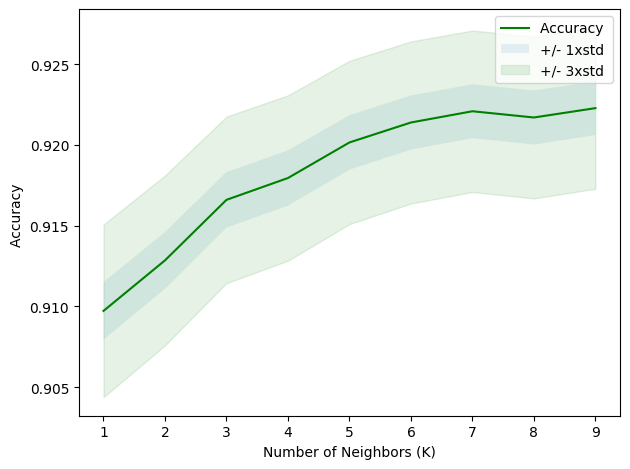

In [18]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [20]:
yhat = knn.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 1, 0])

In [21]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.9337477917539507
test accuracy is: 0.9220789250135145


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10039  1191]
 [  827 13841]]


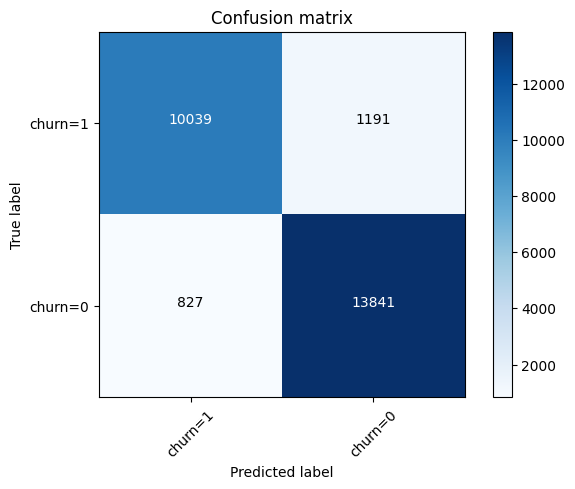

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [24]:
print (classification_report(y_test, yhat))
#satisfied: 1
#dissatisfied: 0

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14668
           1       0.92      0.89      0.91     11230

    accuracy                           0.92     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.92      0.92      0.92     25898



## Classification using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [26]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 0, ..., 1, 1, 0])

Confusion matrix, without normalization
[[ 8911  2319]
 [ 1920 12748]]


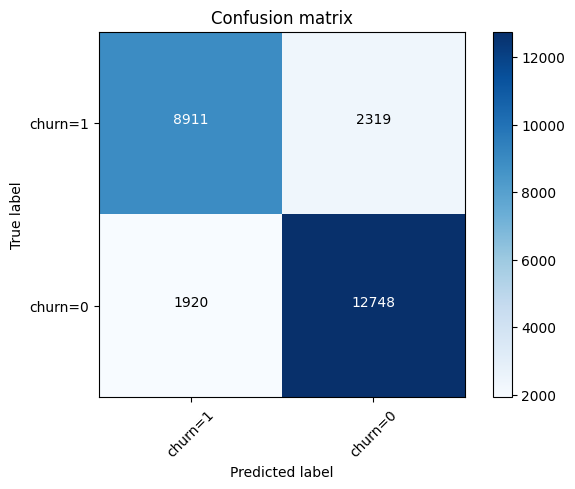

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [28]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     14668
           1       0.82      0.79      0.81     11230

    accuracy                           0.84     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.84      0.84      0.84     25898



## Classification using Support Vector Machine

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [30]:
yhat = clf.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     14668
           1       0.93      0.89      0.91     11230

    accuracy                           0.92     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.92      0.92      0.92     25898

Confusion matrix, without normalization
[[13881   787]
 [ 1215 10015]]


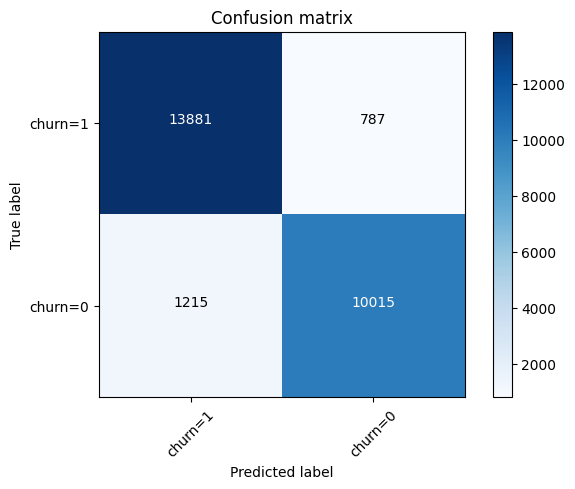

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

## So KNN is the best algorithm among the above, since it has higher accuracy than Logistic Regression and has lower False Negative!